![BridgingAI Logo](../bridgingai_logo.png)

# BasicsML - Exercise 2: Probability Density Estimation

In this exercise, you will implement several of the methods presented in the lecture videos, such as K-NN/Kernel Density Estimation, and the Expectation Maximization algorithm to train Gaussian Mixture Models.

# Q1: Maximum Likelihood
Recall the general steps of deriving the Maximum Likelihood (ML) estimate of a parametric distribution $p(x|\theta)$:
1. Forming the log-likelihood $\mathcal{L}(\theta) = \log p(x|\theta)$
2. Finding $\frac{\partial\mathcal{L}}{\partial \theta}$, the derivative of $\mathcal{L}(\theta)$ with respect to the parameters $\theta$
3. Maximizing the likelihood of the data by setting this derivative to zero and solving for $\theta$:

$$\frac{\partial\mathcal{L}}{\partial \theta} \overset{!}{=} 0$$

## Q1.1: Example
Consider the following function

$$\begin{aligned}
		p(x|\theta) = \theta^2x\exp(-\theta x)g(x)
\end{aligned}$$

where $g(x)$ is the unit step function with
    
$$\begin{aligned}
		g(x) =
			\begin{cases}
				1 & \mbox{if } x > 0 \\
				0 & \mbox{if } x \le0
			\end{cases}
\end{aligned}$$

Given $N$ measurements $x_1,...,x_N > 0$ of $x$, what is the maximum likelihood estimate $\tilde{\theta}\,$?

YOUR ANSWER HERE

## Q1.2: Implementing ML for the Gaussian
Next, we will implement the Maximum Likelihood estimate for a Gaussian.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


def load_data(name):
    data = np.load(f"{name}.npz")
    return tuple(data[f] for f in data.files)

Implement a 1d Gaussian in the cell below.
Recall that a Gaussian distribution has the following probability density:

$$\mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

In [3]:
def gauss1D(x, m, s):
    # compute the likelihood of a sample x under a Gaussian with mean m and standard deviation s
    # Input
    #  x       : N length vector of data points
    #  m       : mean of the Gaussian
    #  s       : scale (standard deviation) of the Gaussian
    # Output
    #  density : N length vector of densities

    # YOUR CODE HERE
    density = np.exp(-(1/2)*((x-m)/s)**2)/(s*np.sqrt(2*np.pi))

    return density

Next, implement the function `ml_estimate` that estimates the mean $\mu$ and standard deviation $\sigma$ from a set of samples.
Make sure to compute the unbiased estimate for the variance.

In [7]:
def ml_estimate(samples):
    # compute the maximum likelihood estimate of a 1d Gaussian given a set of samples
    # Input
    #  samples : N length vector of samples
    # Output
    #  mu      : estimated mean of the Gaussian
    #  sigma   : estimated scale (standard deviation) of the Gaussian

    # YOUR CODE HERE
    samples = np.array(samples)
    mu = samples.mean()
    sigma = samples.std(ddof=1)

    return mu, sigma

Now run the code cell below to test your implementation with some sample data that we provide.
Do you think your estimate fits the data?
Why or why not?

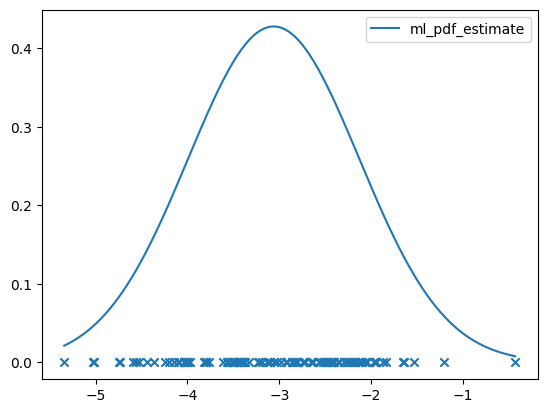

Estimate for sample set 1 has mean -3.06032 and variance 0.93201


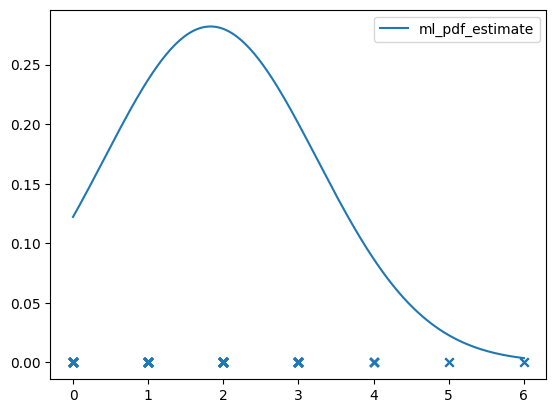

Estimate for sample set 2 has mean 1.83000 and variance 1.41461


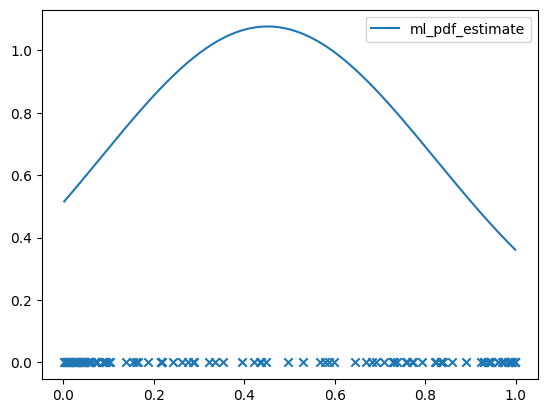

Estimate for sample set 3 has mean 0.45132 and variance 0.37046


In [8]:
# Load samples
samples = load_data("random_samples")


def plot_estimates(samples, **fns):
    # Helper function to plot density estimates
    _, ax = plt.subplots(1)
    ax.scatter(samples, np.zeros_like(samples), marker="x")
    pos = np.linspace(samples.min(), samples.max(), 200)
    for n, f in fns.items():
        ax.plot(pos, f(pos), label=n)
    plt.legend()
    plt.show()


for i, points in enumerate(samples):
    # Compute the ML estimates and plot samples + estimated Gaussian
    mu, sigma = ml_estimate(points)
    gauss_estimate = partial(gauss1D, m=mu, s=sigma)
    plot_estimates(points, ml_pdf_estimate=gauss_estimate)
    print(f"Estimate for sample set {i+1} has mean {mu:.5f} and variance {sigma:.5f}")

# Q2: Kernel / K-Nearest Neighbor Density Estimators
In this part of the exercise you will implement nonparametric density estimates, i.e. functions which estimate the probability density function (pdf) of a given dataset without assumptions of some underlying generating function.

In particular, you will implement Kernel Density Estimation (KDE) and K-Nearest Neighbors (KNN) Density Estimation.
Remember that both approaches use the following approximation:

$$
p(x) \approx \frac{K}{NV}
$$

## Q2.1 Implementing Kernel Density Estimation
In Kernel Density Estimation, we keep $V$ fixed and estimate $K$ using some kernel function $k$:

$$
K = \sum_{n=1}^N{k(\mathbf{x}-\mathbf{x}_n)}, \quad V = \int k(\mathbf{u}) \mathrm{d}\mathbf{u} = 1
$$

where $\mathbf{x}_n$ are the training data. Hence,
$$
p(x) \approx \frac{K}{NV} = \frac{1}{N} \sum_{n=1}^N{k(x-x_n)}.
$$

First, implement the Parzen Window estimator which is defined as

$$
k(\mathbf{u}) = 
\begin{cases}\frac{1}{h}, & |u_i| \leq \frac{h}{2} \quad \forall i=1, \dots, D \\
0, & else
\end{cases}
$$

Note that we use a slightly different formulation than the lecture to make sure $k$ integrates to 1.

Complete the function below to compute this kernel.

In [ ]:
def parzen(u, h):
    # apply the parzen window
    # Input
    #  u       : vector of inputs
    #  h       : window size/radius of kernel
    # Output
    #  density : vector of kernel values of the Parzen window

    # YOUR CODE HERE
    raise NotImplementedError()

Now write a function `kde` that takes the samples and kernel function as parameters and returns the estimated density for the given input $x$ using kernel density estimation.

To test your implementation, you can skip ahead and apply it to the sample data further below.

In [ ]:
def kde(x, samples, kernel):
    # compute density estimation from samples with KDE
    # Input
    #  x          : vector of N test points
    #  samples    : vector of M (training) data points
    #  kernel     : kernel function
    # Output
    #  estDensity : estimated density for x, vector with N entries

    # YOUR CODE HERE
    raise NotImplementedError()

    assert estDensity.shape[0] == x.shape[0]

    return estDensity

## Q2.2 Implementing KNN density estimation
In KNN density estimation, we keep $K$ fixed and estimate $V$.

Complete the function `knn` below.
The function should take the samples and the number of nearest neighbors $k$ as input and estimate the density using K-Nearest Neighbors density estimation.

**Hint:** you may find Numpy's [sort function](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) helpful.

In [ ]:
def knn(x, samples, k):
    # compute density estimation from samples with KNN
    # Input
    #  x          : vector of N test points
    #  samples    : vector of M (training) data points
    #  k          : number of neighbors
    # Output
    #  estDensity : vector of length N, estimated density for x

    # YOUR CODE HERE
    raise NotImplementedError()

    assert estDensity.shape[-1] == x.shape[-1]

    return estDensity

## Q2.3: Applying and visualizing different estimation methods
Use the following code to visualize your results.
Play around with the hyperparameters; what do you notice?

In [ ]:
k = 45  # knn neighbors
h = 0.6  # kde window size (Parzen window)
s = 0.4  # kde standard deviation (Gaussian kernel)

gauss_kernel = lambda x: gauss1D(x, 0, s)
parzen_kernel = lambda x: parzen(x, h)

for points in samples:
    estimators = {
        # comment out one or more of these lines to omit them from the visualization
        "kde_gauss": lambda x: kde(x, points, gauss_kernel),
        "kde_parzen": lambda x: kde(x, points, parzen_kernel),
        "knn_k": lambda x: knn(x, points, k),
        "gauss_ml": lambda x: gauss1D(x, *ml_estimate(points)),
    }

    plot_estimates(points, **estimators)

# Q3: Gaussian Mixture Models
We are now going to implement multi-dimensional Gaussian Mixture Models (GMMs) to model complex distributions with multiple clusters.
In order to make your implementation efficient, try to avoid using loops in Python and use Numpy features such as broadcasting and vectorization instead.

## Q3.1: Computing the log-likelihood
Below, we provide the framework for a Gaussian Mixture Model.
Complete the function that computes the log-likelihood of an initialized model.

Recall that the likelihood is the probability of the dataset actually being generated by the given parameters:
$$\mathcal{L} = p(X|\theta) = \prod_{n=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_n, \mu_k, \Sigma_k)$$
Also, the log-likelihood is:
$$
    E(\theta) = \ln p(X|\theta) 
    = \ln\Biggl(\prod_{n=1}^N \sum_{k=1}^K \pi_k \mathcal{N}(x_n, \mu_k, \Sigma_k)\Biggr) 
    = \sum_{n=1}^N \ln \sum_{k=1}^K \pi_k \mathcal{N}(x_n, \mu_k, \Sigma_k)
$$

First, complete the function below that computes the likelihood of a single sample using a multivariate Gaussian distribution.

In [ ]:
def multivariate_gauss(x, mean, covariance):
    # compute the probability of a sample x under a Gaussian with given mean and covariance
    # Input
    #  x          : NxD matrix of input samples
    #  mean       : D-dim mean of the Gaussian
    #  covariance : DxD covariance matrix of the Gaussian
    # Output
    #  density    : Nx1 matrix of density values

    assert x.shape[-1] == mean.shape[-1] == covariance.shape[0] == covariance.shape[1]

    # YOUR CODE HERE
    raise NotImplementedError()

    assert density.shape[0] == x.shape[0]

    return density

Run the cell below to test your implementation.
You should see a wireframe plot of a 2D gaussian.

In [ ]:
from matplotlib import cm

mu, sigma = np.array([1, 1]), np.array([[1, 0.5], [0.5, 1]])

# Create grid and multivariate normal
x = np.linspace(-2, 4, 500)
y = np.linspace(-2, 4, 500)
X, Y = np.meshgrid(x, y)
pos = np.stack([X, Y], axis=-1)

pdf = multivariate_gauss(pos.reshape(-1, 2), mu, sigma).reshape(pos.shape[:2])
# Make a 3D plot
fig = plt.figure()
ax = plt.axes(projection="3d")
surf = ax.plot_surface(X, Y, pdf, facecolors=cm.viridis(pdf / pdf.max()))
# transparent facecolors make it a wireframe plot
surf.set_facecolor((0, 0, 0, 0))

plt.show()

Next, complete the `loglikelihood` function below.
The method should take a set of samples $\mathbf{x}$ and the parameters of the mixture model $\pi_k, \mu_k, \Sigma_k$ as input and return the loglikelihood of the data given the model.

In [ ]:
def loglikelihood(x, weights, means, covariances):
    # computes the loglikelihood of x under a GMM with given parameters
    # Input
    #  x             : NxD array of datapoints
    #  weights       : K weights, one for each component density
    #  means         : KxD array, one mean for each component density
    #  covariances   : KxDxD array, one DxD covariance matrix for each component
    # Output
    #  logLikelihood : loglikelihood of x under the GMM (scalar)

    assert (
        x.shape[-1] == means.shape[-1]
    ), "expected data and means to have same dimensionality"
    N, D = x.shape
    K, _ = means.shape

    logLikelihood = 0
    # YOUR CODE HERE
    raise NotImplementedError()

    return logLikelihood

Run the code cell below to test the correctness of your implementation.

In [ ]:
weights, means, covariances, expected = load_data("test_logprob")

# load datasets
data = [np.loadtxt(f"data{i+1}.dat") for i in range(3)]

predicted = np.array([loglikelihood(x, weights, means, covariances) for x in data])
if not np.allclose(expected, predicted):
    print(
        f"Loglikelihood is {predicted}, should be {expected}, difference is {expected - predicted}"
    )
else:
    print("Loglikelihood seems correct")

## Q3.2: Implement the EM algorithm for GMMs
The EM algorithm iteratively estimates the parameters of a mixture model by alternating between the E-Step and the M-Step.
The E-Step softly assigns samples to component distributions, and the M-Step reestimates the parameters from the new assignments.

Implement the missing parts of the `EStep` function in the code cell below.

In [ ]:
def EStep(weights, means, covariances, X):
    # compute the responsibilities (gamma) used in the EM algorithm
    # Input
    #  weights     : K weights, one for each component density
    #  means       : KxD array, one mean for each component density
    #  covariances : KxDxD array, one DxD covariance matrix for each component
    #  X           : NxD array, datapoints to be fit
    # Output
    #  gamma       : NxK array, responsibility of component k for datapoint n

    N, D = X.shape
    K = len(weights)

    gamma = np.zeros((N, K))
    # YOUR CODE HERE
    raise NotImplementedError()

    return gamma

You can check your implementation by running the following cell.

In [ ]:
# test EStep
expected = load_data("test_gammas")
predicted = [EStep(weights, means, covariances, x) for x in data]
if not np.all([np.allclose(p, e) for p, e in zip(predicted, expected)]):
    diffs = [np.abs(p - e).sum() for p, e in zip(predicted, expected)]
    print(f"Gamma not as expected; sum of differences is {diffs}")
else:
    print("E-Step seems correct")

Next, complete the missing parts of the MStep to compute the updated parameters using the responsibilities computed in the E-Step.

In [ ]:
def MStep(gamma, X):
    # compute the updated parameters of the GMM
    # Input
    #  gamma       : responsibilities as computed in the E-Step
    #  X           : NxD array, datapoints to be fit
    # Output
    #  weights     : K weights, one for each component density
    #  means       : KxD array, one mean for each component density
    #  covariances : KxDxD array, one DxD covariance matrix for each component

    # Get the sizes
    n_training_samples, dim = X.shape
    K = gamma.shape[1]

    # Create matrices
    means = np.zeros((K, dim))
    covariances = np.zeros((K, dim, dim))

    # YOUR CODE HERE
    raise NotImplementedError()

    return weights, means, covariances

Again, you can check your implementation with some sample data.

In [ ]:
# test MStep
testgamma = load_data("test_gammas")
expected = load_data("test_mstep")

predicted = [MStep(g, d) for g, d in zip(testgamma, data)]

for idx in range(3):
    new_weights, new_means, new_cov = predicted[idx]
    assert np.allclose(new_weights, expected[0][idx])
    assert np.allclose(new_means, expected[1][idx])
    assert np.allclose(new_cov, expected[2][idx])
print("M-Step seems correct")

In the EM algorithm, it is important to regularize the covariance matrix, so that it remains invertible and symmetric.
We enforce full rank by adding a small $\epsilon$ to the diagonal values of the matrix.
To ensure that $\Sigma$ is symmetric, we actually return $0.5 (\Sigma + \Sigma^T)$.

Implement these steps in the function below.

In [ ]:
def regularize_cov(covariance, epsilon):
    # regularize the covariance matrix
    # Input
    #  covariance      : KxDxD array, covariance matrices
    #  epsilon         : small scalar value
    # Output
    #  regularized_cov : KxDxD array, regularized covariance matrices

    # YOUR CODE HERE
    raise NotImplementedError()

    return regularized_cov

Run the next cell to check your implementation.

In [ ]:
covariances, expected = load_data("test_regularization")
predicted = [regularize_cov(cov, 0.01) for cov in covariances]

if not np.all([np.allclose(p, e) for p, e in zip(predicted, expected)]):
    diffs = [np.abs(p - e).sum() for p, e in zip(predicted, expected)]
    print(f"Regularized covariance not as expected; sum of differences is {diffs}")
else:
    print("Regularization seems correct")

Now, use your implementation of E-Step and M-Step above to complete the code for the EM algorithm below.
Your code should initialized the GMM with some iterations K-Means, perform the EM algorithm using the `EStep` and `MStep` functions, and regularize the covariance matrices using the given epsilon.
You may terminate early if the change in log-likelihood between successive iterations is very small.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


def gmm_from_clustering(X, cluster_labels, cluster_centers):
    # computes an initial assignment with K-Means clustering
    N, D = X.shape
    K = len(cluster_centers)
    weights = np.ones(K) / K
    means = cluster_centers
    covariances = np.stack([np.eye(D) for _ in range(K)], axis=0)
    for j in range(K):
        X_cluster = X[cluster_labels == j]
        min_dist = np.inf
        for i in range(K):
            # compute sum of distances in cluster
            dist = np.mean(euclidean_distances(X_cluster, [means[i]], squared=True))
            if dist < min_dist:
                min_dist = dist
        covariances[j] = np.eye(D) * min_dist
    return weights, means, covariances


def estGaussMixEM(data, K, n_iters, epsilon):
    # applies the EM algorithm to the given data
    # Input
    #  data    : NxD array, training data samples
    #  K       : number of components in the GMM
    #  n_iters : number of EM iterations to run
    #  epsilon : regularization value (some small scalar)
    # Output
    #  weights     : K weights, one for each component density
    #  means       : KxD array, one mean for each component density
    #  covariances : KxDxD array, one DxD covariance matrix for each component

    # Initialize GMM with some iterations KMeans
    kmeans = KMeans(n_clusters=K, n_init=10).fit(data)
    weights, means, covariances = gmm_from_clustering(
        data, kmeans.labels_, kmeans.cluster_centers_
    )

    # YOUR CODE HERE
    raise NotImplementedError()

    return weights, means, covariances

Run the EM algorithm on the provided test data.
What results do you get?
What happens if you run it with more or less clusters, or for more or less iterations?

In [ ]:
epsilon = 0.0001  # regularization
K = 3  # number of desired clusters
n_iter = 5  # number of iterations


def plotGaussian(mu, sigma):
    plt.subplot()
    n = 36
    phi = np.arange(0, n, 1) / (n - 1) * 2 * np.pi
    epoints = np.sqrt(np.abs(sigma)).dot([np.cos(phi), np.sin(phi)]) + mu[:, None]
    plt.plot(epoints[0, :], epoints[1, :], "r")


# compute GMM on all 3 datasets
for idx in range(3):
    print(f"Evaluating on dataset {idx+1}")

    # compute GMM
    weights, means, covariances = estGaussMixEM(data[idx], K, n_iter, epsilon)

    # plot result
    plt.subplot()
    plt.scatter(data[idx][:, 0], data[idx][:, 1])

    for j in range(K):
        plotGaussian(means[j], covariances[j])

    plt.title(f"Data {idx+1}")
    plt.show()

## Q3.3: Image Segmentation with GMMs

Now we apply the EM algorithm on a computer vision task, image segmentation.
In particular, we train one GMM on foreground pixels, and another GMM on background pixels.
The trained GMMs can then be used to decide whether a given pixel belongs to foreground or background, using the likelihood-ratio test.
We define foreground and background regions via bounding boxes; each pixel corresponds to a three-dimensional feature vector, namely its RGB color.

First, train a Gaussian Mixture Model for each dataset using your implementation from the previous part.
Based on these two mixture models, classify the pixels in the provided images according to the __Likelihood Ratio__:

$$ \frac{p(\text{color}|\text{foreground})}{p(\text{color}|\text{background})} > \theta $$

for some suitably chosen $\theta$.
Implement the training in the `train_fg_bg_model` function and the segmentation via likelihood ratio test in the `segment` function.
Your segmentation function should return 0 if the pixel is classified as background and 1 if it is classified as foreground.
To avoid overflows and divide-by-zero errors, you can a very small positive value to the background likelihood.

In [ ]:
def train_fg_bg_model(fgdata, bgdata, K, n_iter, epsilon):
    print("Training background GMM")
    params_bg = estGaussMixEM(bgdata, K, n_iter, epsilon)

    print("Training foreground GMM")
    params_fg = estGaussMixEM(fgdata, K, n_iter, epsilon)
    return params_fg, params_bg


def segment(params_fg, params_bg, theta, img):
    # compute the foreground/background segmentation by applying trained GMMs
    # Input
    #  params_fg : tuple of weights, means, covariances of the foreground GMM
    #  params_bg : tuple of weights, means, covariances of the background GMM
    #  theta     : scalar threshold
    #  img       : the image we want to segment
    # Output
    #  result    : the segmented image (1 for foreground, 0 for background)

    # YOUR CODE HERE
    raise NotImplementedError()

    return result

Run the cell below to load the image.

In [ ]:
from PIL import Image


def im2double(im):
    im = np.asarray(im)
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype("float") - min_val) / (max_val - min_val)
    return out


# load image
img = im2double(Image.open("flower1.jpg"))

Run the cell below to visualize the bounding boxes specifying foreground and background.

In [ ]:
print("Image shape:", img.shape)
# top left x y, bottom right x y
fg = [(100, 75, 90, 85)]
bg = [(5, 0, 50, 220)]


def show_boxes(img, fg, bg):
    from matplotlib.patches import Rectangle

    plt.imshow(img)
    for c, bbs in (("r", fg), ("b", bg)):
        kwargs = dict(linewidth=1, facecolor="none", edgecolor=c)
        for bb in bbs:
            plt.gca().add_patch(Rectangle(bb[:2], bb[2], bb[3], **kwargs))
    plt.show()


show_boxes(img, fg, bg)

Combine the pixels in annotated regions to create the training dataset.

In [ ]:
def sample_bbox(bb):
    # transpose coordinates: plt uses x y and numpy h w
    return img[bb[1] : bb[1] + bb[3], bb[0] : bb[0] + bb[2]].reshape(-1, 3)


fg_samples = np.concatenate([sample_bbox(bb) for bb in fg], axis=0)
bg_samples = np.concatenate([sample_bbox(bb) for bb in bg], axis=0)
print(
    f"{fg_samples.shape[0]} foreground samples, {bg_samples.shape[0]} background samples"
)

Finally, run the cell below to train the GMMs and apply them on the test image.

**Note:** Depending on your implementation, this may take several seconds, since we need to evaluate both GMMs on all pixels. If you want to apply this code on some of your own images, it might be a good idea to resize them to a lower resolution.

In [ ]:
s_n_iter = 5
s_epsilon = 0.0001
s_K = 3
theta = 2.0  # threshold for foreground-to-background likelihood ratio

fg_params, bg_params = train_fg_bg_model(fg_samples, bg_samples, s_K, s_n_iter, epsilon)
segmentation_map = segment(fg_params, bg_params, theta, img)

In [ ]:
plt.imshow(np.clip(segmentation_map, 0, 1000))
plt.axis("off")
plt.show()

How good are your results? Can you get better results by playing around with the hyperparameters?

Can you get similar results on the other images? What happens when you train on one image and evaluate on another?